# Introduction to neural network classification with TensorFlow
In this notebook we're going to learn how to write neural networks for classification probelms.

A clssification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multi-class classification
* Multi-label classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples =1000

# Create circles
X , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand right now... let's visualize it!!

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [6]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

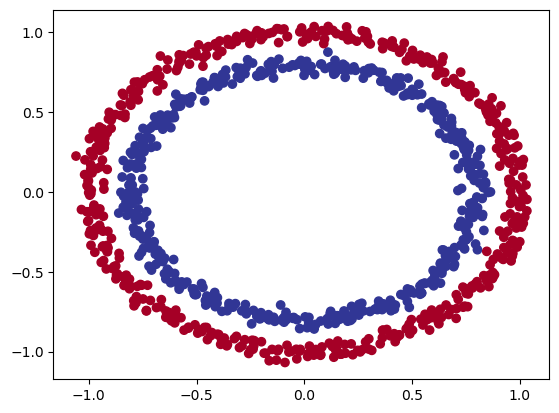

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

## Input and output shapes

In [8]:
# Check the shape of our features and lebels
X.shape , y.shape

((1000, 2), (1000,))

In [9]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [10]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [11]:
# How many samples we're working
len(X) , len(y)

(1000, 1000)

In [12]:
# View the first example of features and lebels
X[0] , y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The step in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..


In [13]:
# Import TensorFlow
import tensorflow as tf

In [14]:
# Set the ramdom seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit (X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 8s 5ms/step - loss: 4.6393 - accuracy: 0.4760
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 4.1233 - accuracy: 0.4730
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 2.2290 - accuracy: 0.4850
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7410 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7087 - accuracy: 0.4980


In [15]:
# Let's try and imporve our model by training for longer ...
model_1.fit(X,y,epochs=200,verbose=1)
model_1.evaluate(X,y)

Epoch 1/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6989 - accuracy: 0.5010
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.5030
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.4700
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4790
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4740
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5120
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4930
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 9/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.4850
Epoch 10/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.4810
Epoch 11/

[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch andd add an extra layer.

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3.Fit the model
model_2.fit(X , y , epochs=100 , verbose=0)

In [17]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932775378227234, 0.5]

## Improve our model


Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increse the number of hidden units within a layers.
2. Compiling a model - here we might to choose a different optimization func such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for mor epochs (leave it training for longer).

In [18]:
 # Set te random seed
 tf.random.set_seed(42)

 # 1. Create the model (this time 3 layers)
 model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(100), # Add 100 dense neurons
     tf.keras.layers.Dense(10), # Add another layer with 10 neurons
     tf.keras.layers.Dense(1)
 ])

 # 2. Compile the model
 model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

 # 3. Fit the model
 model_3.fit(X,y,epochs=100,verbose=0)

In [19]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5040


[0.6931978464126587, 0.5040000081062317]

To visualize our model's predictions, let's create a function `plot_decision_boundary()` , this function will ⁉
* Take in a trained model , features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [20]:
import numpy as np

In [21]:
import numpy as np

def plot_decision_boundary(model , X , y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundary of the plot and create a meshgrid
  x_min,x_max = X[:,0].min() - 0.1 , X[:,0].max()+0.1
  y_min,y_max = X[:,1].min() - 0.1 , X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  # Create X value (we're going to meke predictions on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1 :
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu , alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y , s=40 ,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())



In [22]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

313/313 [==============================] - 0s 1ms/step
doing binary classification


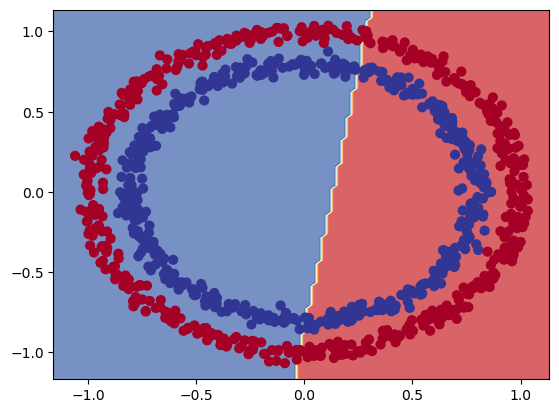

In [23]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [24]:
# Let's see if our model can be used for a regression problem ...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5) 
y_regression = tf.range(100,1100,5) 

X_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [25]:
 # Split our regression data into training and test sets 
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:0]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:] 
 

In [26]:
x_min,x_max = X[:,0].min() - 0.1 , X[:,0].max() + 0.1
y_min,y_max = X[:,1].min() - 0.1 , X[:,1].max() + 0.1
x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

Oh wait... we compile our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suite our data

In [27]:
# # Setup random seed 
# tf.random.set_seed(42)


# X_reg_train = tf.expand_dims(X_reg_train, axis=-1)

# # 1. Create the model
# model_3 = tf.keras.Sequential ([
#     tf.keras.layers.Dense (100,input_shape=(X_reg_train.shape[1],)) ,
#     tf.keras.layers.Dense(10),
#     tf.keras.layers.Dense(1)
    
# ])

# #2. Compile the model, this time with a regression-specific loss function
# model_3.compile(loss=tf.keras.losses.mae,
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["mae"])

# # 3. Fit the model
# model_3.fit(X_reg_train,y_reg_train,epochs=100)



# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons
  # After TensorFlow 2.7.0
  tf.keras.layers.Dense(100, input_shape=(1,)), # add 100 dense neurons with input_shape defined 
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['mae'])



In [28]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 336.8595 - mae: 336.8595
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 216.9938 - mae: 216.9938
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 100.8318 - mae: 100.8318
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 54.8305 - mae: 54.8305
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 80.6982 - mae: 80.6982
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 62.6310 - mae: 62.6310
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 43.0920 - mae: 43.0920
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 49.2674 - mae: 49.2674
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 41.8680 - mae: 41.8680
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 44.3451 - mae: 44.3451
Epoch 11/100
5/5 [==============================] - 0

In [29]:
# Make predictions with our trained model 
y_reg_preds = model_3.predict(X_reg_test)

2/2 [==============================] - 0s 3ms/step


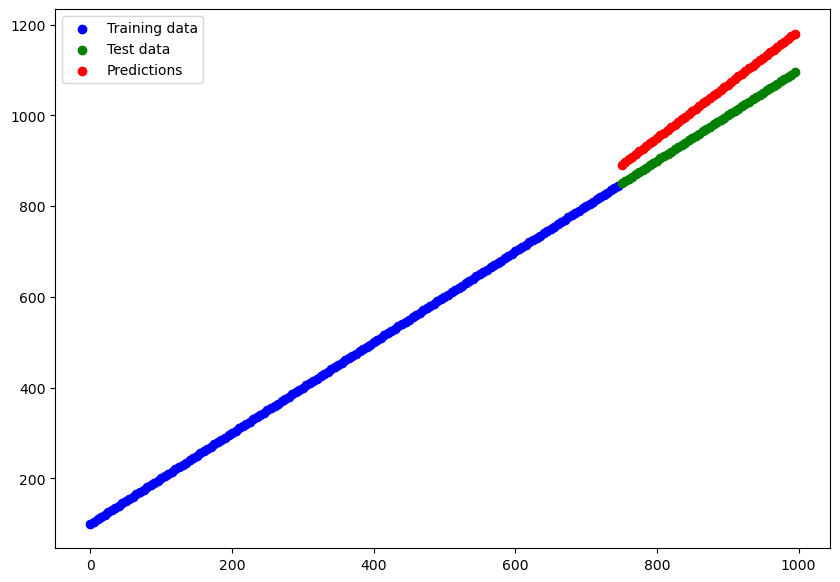

In [30]:


# Plot the model's against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c="b" , label="Training data")
plt.scatter(X_reg_test,y_reg_test , c= "g" ,label="Test data")
plt.scatter(X_reg_test,y_reg_preds,c="r" , label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [31]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential ( [
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.3092 - accuracy: 0.4530
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2403 - accuracy: 0.4560
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1497 - accuracy: 0.4600
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0694 - accuracy: 0.4630
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0450 - accuracy: 0.4610
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9832 - accuracy: 0.4640
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8878 - accuracy: 0.4680
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7282 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6055 - accuracy: 0.4670
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.5726 - accuracy: 0.4700
Epoch 11/

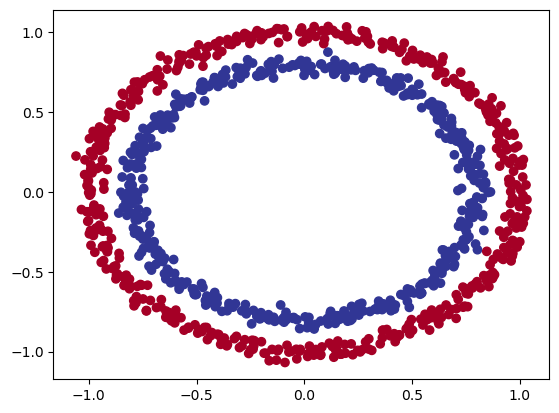

In [32]:
 # Check out our data 
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


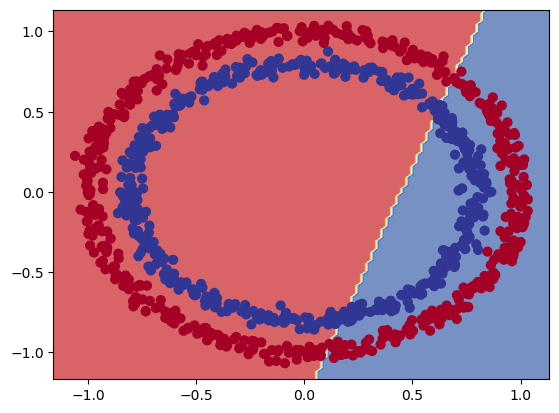

In [33]:
# Check the decision boundary for our lastest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activations dunction

In [34]:
# Set randomseed 
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

# 2. Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.2880 - accuracy: 0.4370
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1915 - accuracy: 0.4450
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1088 - accuracy: 0.4500
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0653 - accuracy: 0.4500
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0207 - accuracy: 0.4500
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9600 - accuracy: 0.4520
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8597 - accuracy: 0.4570
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8165 - accuracy: 0.4620
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7642 - accuracy: 0.4610
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7302 - accuracy: 0.4630
Epoch 11/

In [35]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1),
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_6.fit(X , y , epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 2.9915 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 2.7322 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 2.5970 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 2.5031 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 2.3612 - accuracy: 0.4280
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 2.2292 - accuracy: 0.3960
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 2.0757 - accuracy: 0.3830
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 1.8271 - accuracy: 0.4060
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1440 - accuracy: 0.4250
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8832 - accuracy: 0.4420
Epoch 11/

In [36]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.5470


[0.6748101115226746, 0.546999990940094]

313/313 [==============================] - 0s 1ms/step
doing binary classification


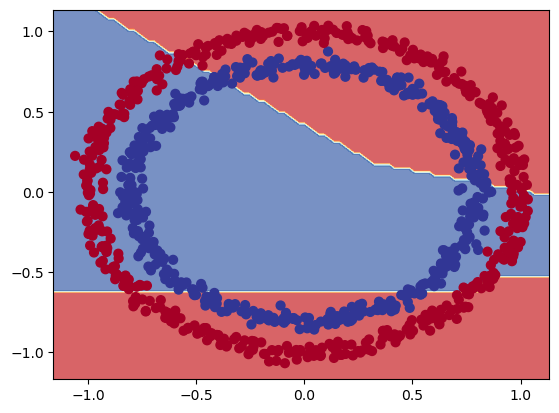

In [37]:
# How do our model predictions look?
plot_decision_boundary(model_6,X,y)

In [38]:
tf.random.set_seed(42)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6995 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5040
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.5090
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.5140
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6794 - accuracy: 0.5140
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6781 - accuracy: 0.5190
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6767 - accuracy: 0.5160
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6757 - accuracy: 0.5210
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6746 - accuracy: 0.5300
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6736 - accuracy: 0.5310
Epoch 11/

In [39]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.4176 - accuracy: 0.8840


[0.4175955057144165, 0.8840000033378601]

313/313 [==============================] - 1s 2ms/step
doing binary classification


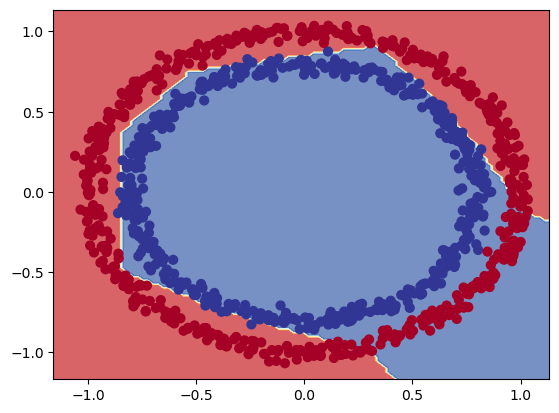

In [40]:
plot_decision_boundary(model_7,X,y)

In [41]:
 # Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

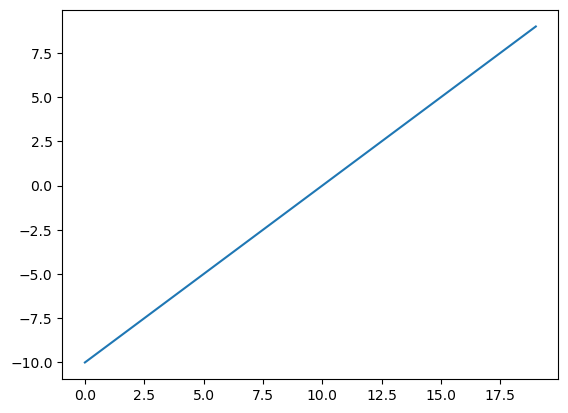

In [42]:
# Visualize our toy tensor
plt.plot(A);

In [43]:
# Let's start by replicating sigmoid = sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid (x) :
    return 1/(1+ tf.exp(-x))

# Use the sigmoid func on your toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

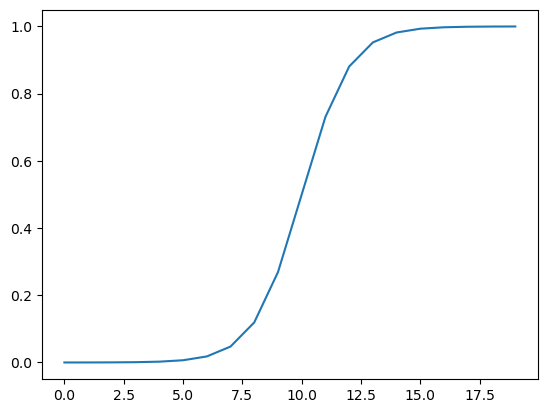

In [44]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [45]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0 , x)

# Pass our toy
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

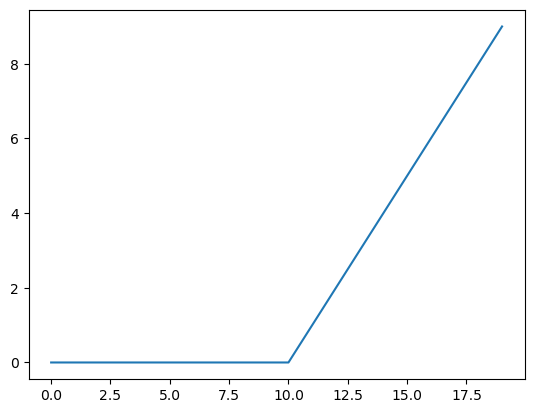

In [46]:
plt.plot(relu(A))

In [47]:
# Let's try linear activation
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

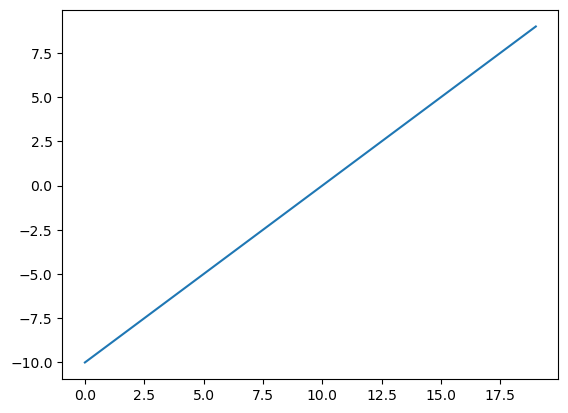

In [48]:
plt.plot(tf.keras.activations.linear(A))

In [49]:
# Does A even same ?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improve our classification

So far we'ev been training and testing on the same dataset....

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [50]:
# Check how many example we have 
len(X)

1000

In [51]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [52]:
# Split ito train and test set
X_train , y_train = X[:800] , y[:800]
X_test , y_test = X[800:] , y[800:]

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [53]:
# Let's recreate a model to fit on the training data and evaluate on testing data

tf.random.set_seed(42)
model_8 = tf.keras.Sequential ([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_8.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history = model_8.fit(X_train , y_train , epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 5ms/step - loss: 0.6963 - accuracy: 0.4462
Epoch 2/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.5263
Epoch 4/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6753 - accuracy: 0.6100
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6649 - accuracy: 0.6087
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6467 - accuracy: 0.6288
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6213 - accuracy: 0.7900
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5876 - accuracy: 0.7987
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5351 - accuracy: 0.8788
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.4732 - accuracy: 0.9150
Epoch 11/25
25/25 [

In [54]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0505 - accuracy: 0.9900


[0.05050539970397949, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


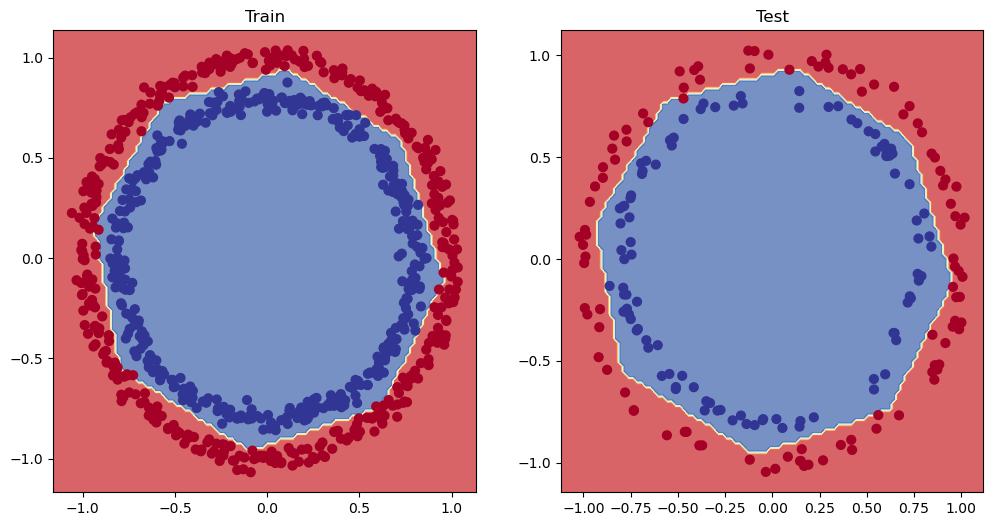

In [55]:
# Plot the decision boundary for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)

In [56]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 4)                 12        
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Plot the loss (or training) curve

In [57]:
history.history

{'loss': [0.6962880492210388,
  0.6888501048088074,
  0.6830280423164368,
  0.6753182411193848,
  0.6648924350738525,
  0.6466808915138245,
  0.621303141117096,
  0.5875588059425354,
  0.5350562930107117,
  0.47320669889450073,
  0.4067290425300598,
  0.3432939648628235,
  0.280120849609375,
  0.2307845503091812,
  0.18722888827323914,
  0.1575535237789154,
  0.12841536104679108,
  0.11099569499492645,
  0.09595850110054016,
  0.0943022221326828,
  0.07884636521339417,
  0.07185542583465576,
  0.06395962834358215,
  0.061779312789440155,
  0.056667156517505646],
 'accuracy': [0.44624999165534973,
  0.5037500262260437,
  0.5262500047683716,
  0.6100000143051147,
  0.6087499856948853,
  0.6287500262260437,
  0.7900000214576721,
  0.7987499833106995,
  0.8787500262260437,
  0.9150000214576721,
  0.9612500071525574,
  0.9800000190734863,
  0.9887499809265137,
  0.9937499761581421,
  0.9912499785423279,
  0.9962499737739563,
  0.9925000071525574,
  0.9962499737739563,
  0.9975000023841858,


In [58]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.696288,0.44625
1,0.688850,0.50375
2,0.683028,0.52625
3,0.675318,0.61000
4,0.664892,0.60875
5,0.646681,0.62875
6,0.621303,0.79000
7,0.587559,0.79875
8,0.535056,0.87875
9,0.473207,0.91500


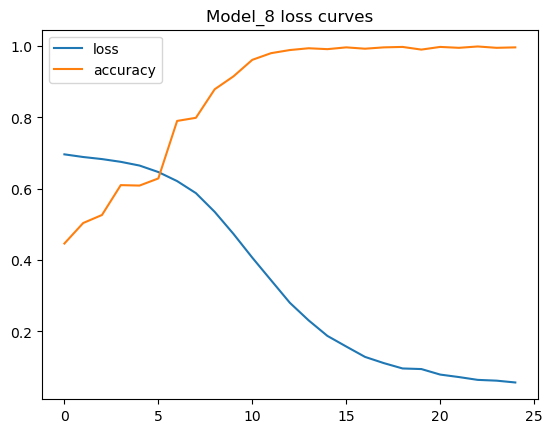

In [59]:
# Plot the loss curves 
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

## Finding the best learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your *while* its training
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curve plot.

In [83]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_9.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

# Create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 0.7036 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7033 - accuracy: 0.4950 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7030 - accuracy: 0.4950 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.4938 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7023 - accuracy: 0.4925 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7020 - accuracy: 0.4938 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7016 - accuracy: 0.4925 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7012 - accuracy: 0.4900 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

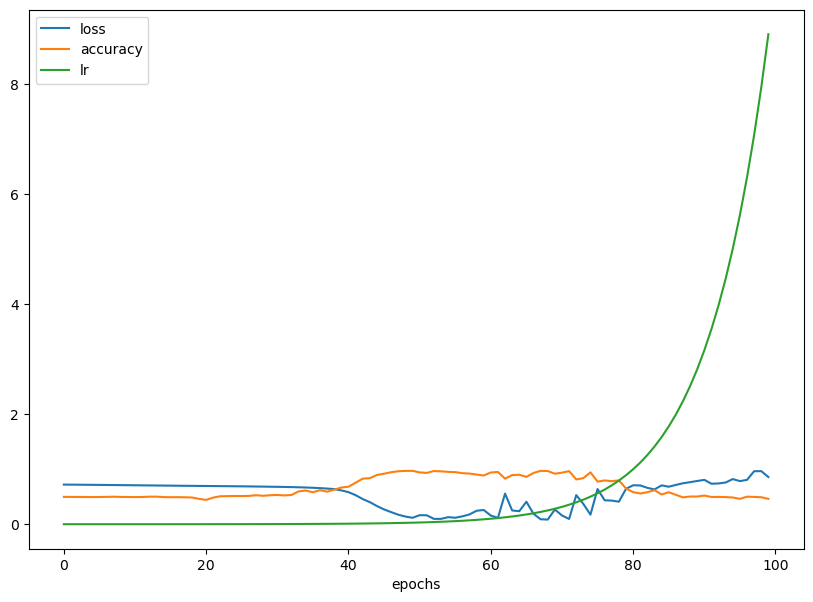

In [78]:
# Checkout the history 
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

In [80]:
lrs = 1e-4 * 10**(tf.range(100)/20)
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [63]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate vs. Loss')

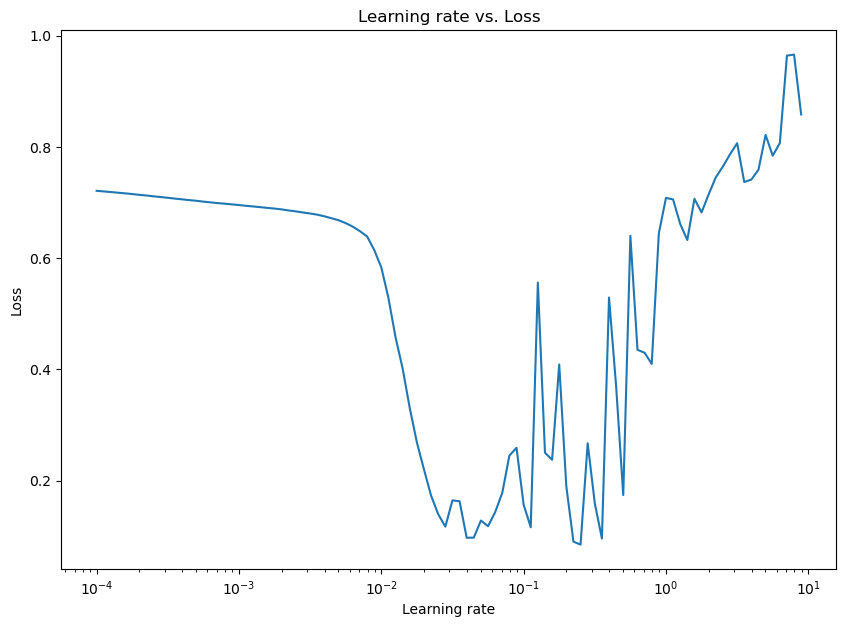

In [81]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [65]:
# Example of other typical learning rates values:
10**0 ,10**-1 , 10**-2 , 10**-3 , 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [86]:
# Let's try using a higher *ideal* learning rate with the same model
tf.random.set_seed(42)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.023), loss="binary_crossentropy", metrics=["accuracy"])

# Create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_10 = model_10.fit(X_train,
                        y_train,
                        epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6827 - accuracy: 0.5587
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6641 - accuracy: 0.6313
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6249 - accuracy: 0.7150
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5408 - accuracy: 0.8313
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4251 - accuracy: 0.8900
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2852 - accuracy: 0.9638
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1977 - accuracy: 0.9675
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1437 - accuracy: 0.9800
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1087 - accuracy: 0.9862
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9912
Epoch 11/20
25/25 [

In [87]:
 # Evaluate model 10 on the test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.9950


[0.0267937034368515, 0.9950000047683716]

In [88]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9900


[0.05050539970397949, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


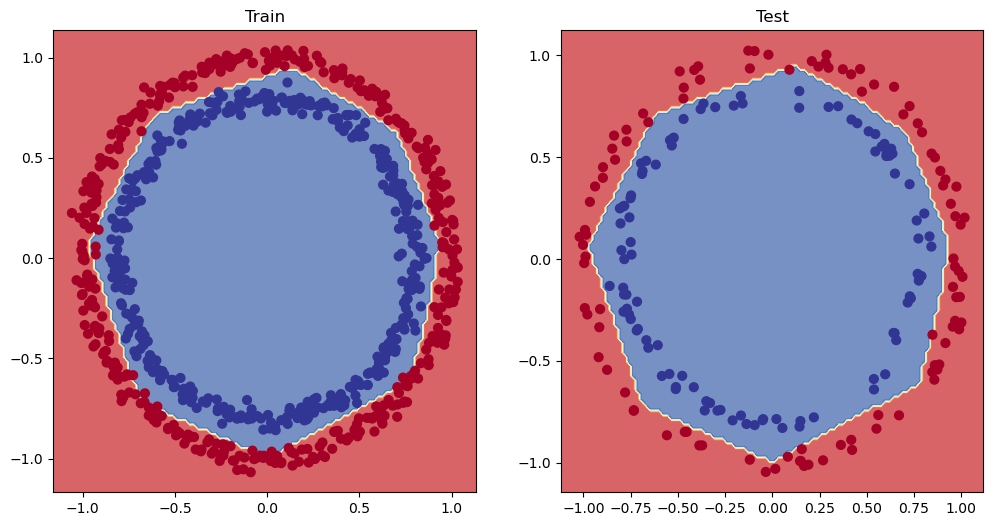

In [89]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()

## More classification evaluation method

Alongside visualizing our models results as much as possible , there are a handful of other classification evaluation nethods & metric you should be familiar with :
- **Accuracy**: This is the simplest evaluation metric. It is the ratio of correct predictions to total predictions. However, it is not a good metric when the classes are imbalanced.
- **Precision**: This is the ratio of true positives to the sum of true positives and false positives
- **Recall**: This is the ratio of true positives to the sum of true positives and false negatives
- **F1-score**: This is the harmonic mean of precision and recall. It is a good metric when the classes are imbalanced.


In [90]:
# Check accuracy of our model
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set : {loss}")
print(f"Model accuracy on the test set : {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9950
Model loss on the test set : 0.0267937034368515
Model accuracy on the test set : 99.50%


How about confusion metrix

In [91]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions 
y_preds = model_10.predict(X_test)

# Create confusion metrix
# confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 2ms/step


Oops.. looks like our predictions array has come out in **prediction probability** form... the standard putput from the sigmoid (or softmax) activation functions.

In [92]:
# Convert predictions probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [93]:
# Create confusion metrix
confusion_matrix(y_test,tf.round(y_preds))

array([[100,   1],
       [  0,  99]], dtype=int64)

How about we prettify our confusion metrix ?

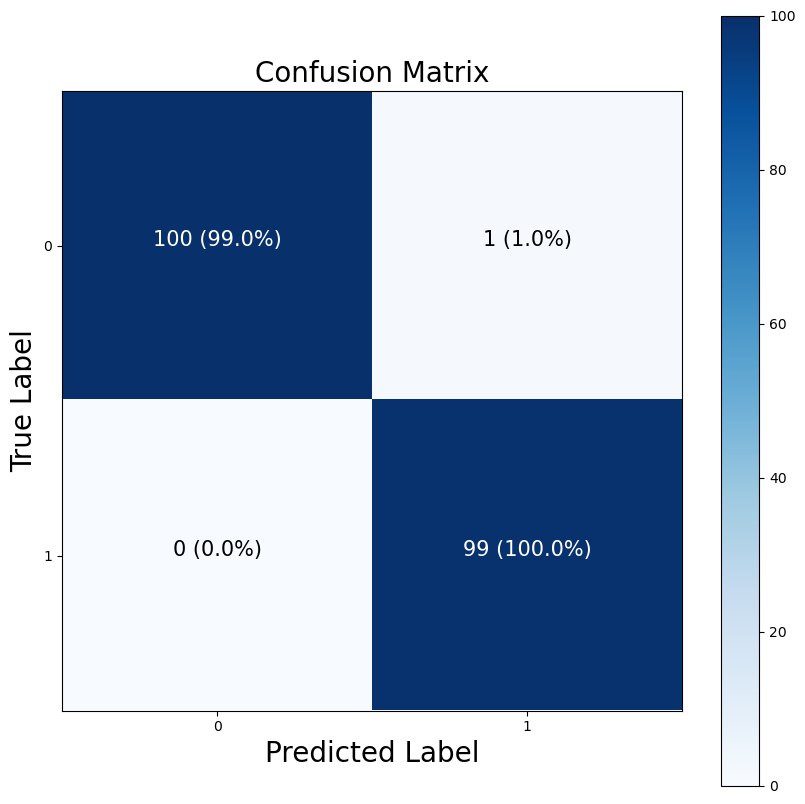

In [95]:
# Note : the confusion metrix we're about to write is a remix of scikit-learn's plot_confusion_metrix 

import itertools

figsize = (10,10)

# Create the confusion metrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # Normalize our confusion metrix
n_classes = cm.shape[0]

# Let's prettify it
fig , ax = plt.subplots(figsize=figsize)
# Create a metrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else :
    labels = np.arange(cm.shape[0])
    
    # Labels the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    
# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
    
# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell 
for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i , f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=15)

# Working with a larger example (Multiclass classification)

When you have more than two classes as an option, it's known as **multiclass classification**.
* This means is you have 3 differentclasses , it's multiclass classification.
* It also mean if you have 100 different classes, it's multi-class classification.

To pratice multi-class classification, we're going to build a neural network to classify image of different items of clothing.

In [97]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [98]:
# Show the first training example
print(f"Training sample:\n {train_data[0]}")
print(f"Training label:\n {train_labels[0]}")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [99]:
# Check the shape of a single example
train_data[0].shape , train_labels[0].shape

((28, 28), ())

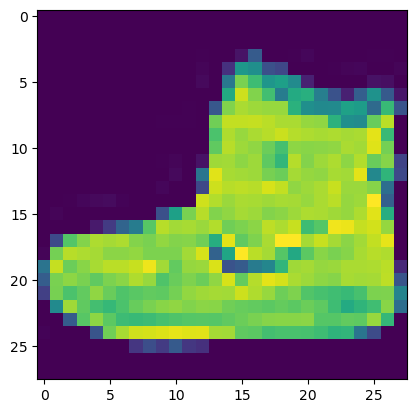

In [100]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [101]:
#Check out sample label
train_labels[0]

9

In [103]:
# Create a small list so we can index onto our training labels so they're human-readable
class_name = ["T-shirt" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot"]

len(class_name)

10

Text(0.5, 1.0, 'Ankle boot')

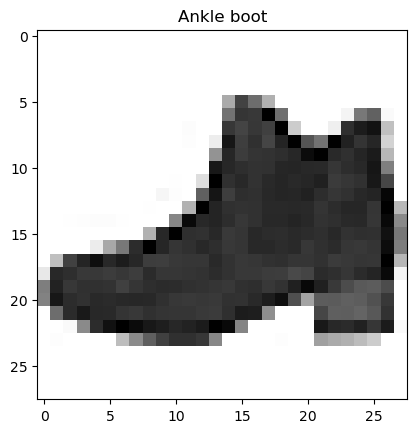

In [110]:
# Plot an example image and its label
index_of_choice = 15
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

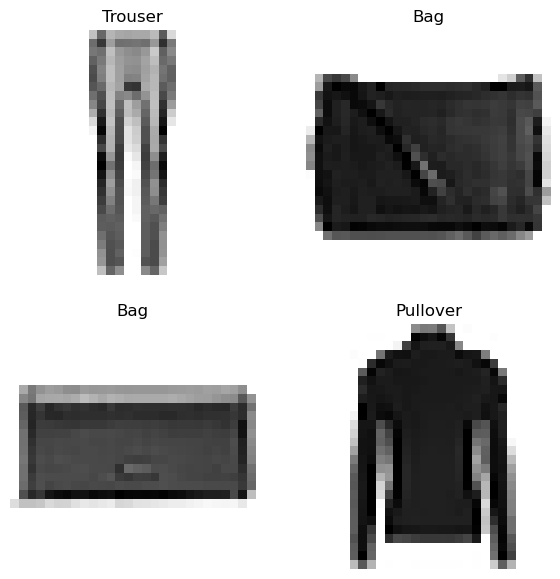

In [116]:
# Plot random
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot (2,2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_name[train_labels[rand_index]])
    plt.axis(False)

## Build a multi-class classification model

For our multi-class model, we can use a similar architecture to our binary classifiers, however , we're going to have to tweak a few things :
* Input shape = 28 x28 (the shape of one image)
* Output shape = 10 (One per class)
* Loss function = tf.keras.losses.CategoricalCrosstentropy()
    * If your label are one-hot encode, use CategoricalCrossentropy if integer form use SparseCategoricalCrossentropy
* Output layer activation = Softmax

In [126]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

non_norm_history = model_11.fit(train_data,
                            tf.one_hot(train_labels,depth=10),
                            epochs=10,
                            validation_data=(test_data,tf.one_hot(test_labels ,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1166 - accuracy: 0.2074 - val_loss: 1.9139 - val_accuracy: 0.2297
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8023 - accuracy: 0.2692 - val_loss: 1.7417 - val_accuracy: 0.2664
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5903 - accuracy: 0.3265 - val_loss: 1.5219 - val_accuracy: 0.3231
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4883 - accuracy: 0.3399 - val_loss: 1.4912 - val_accuracy: 0.3204
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4529 - accuracy: 0.3467 - val_loss: 1.4453 - val_accuracy: 0.3447
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4331 - accuracy: 0.3532 - val_loss: 1.4642 - val_accuracy: 0.3420
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4062 - accuracy: 0.3781 - val_loss: 1.3872 - val_accuracy:

In [127]:
# Check the model summary
model_11.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_71 (Dense)            (None, 4)                 3140      
                                                                 
 dense_72 (Dense)            (None, 4)                 20        
                                                                 
 dense_73 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
